## **Neural_Network_Implementation**

In [5]:
import numpy as np

In [6]:
class NeuralNetwork:
    def __init__(
        self,
        input_size,
        hidden_size,
        output_size=1,
        learning_rate=0.01,
        tolerance=0.0001,
    ):
        self.learning_rate = learning_rate
        self.tolerance = tolerance  # Early stopping tolerance
        self.losses = []

        # Initialize weights and biases for input to hidden layer
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(1, hidden_size)

        # Initialize weights and biases for hidden to output layer
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(1, output_size)

    @staticmethod
    def sigmoid(z):
        """Applies the sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def sigmoid_derivative(a):
        """Computes the derivative of the sigmoid function."""
        return a * (1 - a)

    def forward(self, X):
        """Performs forward propagation."""
        # Input to hidden layer
        self.z_hidden = X @ self.weights_input_hidden + self.bias_hidden
        self.a_hidden = NeuralNetwork.sigmoid(self.z_hidden)

        # Hidden to output layer
        self.z_output = self.a_hidden @ self.weights_hidden_output + self.bias_output
        self.a_output = NeuralNetwork.sigmoid(self.z_output)

        return self.a_output

    def backward(self, X, y):
        """Performs backpropagation and updates weights and biases."""
        # Compute output layer error and delta
        output_error = self.a_output - y
        output_delta = output_error * NeuralNetwork.sigmoid_derivative(self.a_output)

        # Compute hidden layer error and delta
        hidden_error = output_delta @ self.weights_hidden_output.T
        hidden_delta = hidden_error * NeuralNetwork.sigmoid_derivative(self.a_hidden)

        # Update weights and biases for output layer
        self.weights_hidden_output -= (
            self.learning_rate * self.a_hidden.T @ output_delta
        )
        self.bias_output -= self.learning_rate * np.sum(
            output_delta, axis=0, keepdims=True
        )

        # Update weights and biases for hidden layer
        self.weights_input_hidden -= self.learning_rate * X.T @ hidden_delta
        self.bias_hidden -= self.learning_rate * np.sum(
            hidden_delta, axis=0, keepdims=True
        )

    @staticmethod
    def compute_loss(y_pred, y_true):
        """Calculates Mean Squared Error (MSE) loss."""
        return np.mean((y_pred - y_true) ** 2)

    def train(self, X, y, epochs=1000, display_loss_every=100):
        """Trains the neural network."""
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Backward pass
            self.backward(X, y)

            # Compute and store the loss
            loss = NeuralNetwork.compute_loss(y_pred, y)
            self.losses.append(loss)

            # Early stopping if loss change is below tolerance
            if (
                epoch > 0
                and np.abs(self.losses[epoch - 1] - self.losses[epoch]) < self.tolerance
            ):
                print(f"Epoch {(epoch + 1):4}, Loss: {loss:.10f}")
                break

            # Display loss at intervals
            if (epoch + 1) % display_loss_every == 0:
                print(f"Epoch {(epoch + 1):4}, Loss: {loss:.10f}")

    def predict(self, X):
        """Generates predictions for the input data."""
        return self.forward(X)

#### **Example: XOR Problem**

In [7]:
X_train = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y_train = np.array([[0], [1], [1], [0]])

# Define network parameters
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1
learning_rate = 1
epochs = 700
display_loss_every = 10

# Initialize the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=learning_rate)

# Train the neural network
nn.train(X_train, y_train, epochs, display_loss_every)

# Make predictions on the training data
predictions = nn.predict(X_train)

# Output the predictions
print("\nPredictions:\n", predictions)

Epoch   10, Loss: 0.2450063994
Epoch   20, Loss: 0.2394418205
Epoch   30, Loss: 0.2326648802
Epoch   40, Loss: 0.2246754138
Epoch   50, Loss: 0.2153061111
Epoch   60, Loss: 0.2043187214
Epoch   70, Loss: 0.1915730968
Epoch   80, Loss: 0.1770512016
Epoch   90, Loss: 0.1608784188
Epoch  100, Loss: 0.1434139415
Epoch  110, Loss: 0.1253022228
Epoch  120, Loss: 0.1074053100
Epoch  130, Loss: 0.0906157371
Epoch  140, Loss: 0.0756310167
Epoch  150, Loss: 0.0628133819
Epoch  160, Loss: 0.0521936952
Epoch  170, Loss: 0.0435753223
Epoch  180, Loss: 0.0366563365
Epoch  190, Loss: 0.0311190559
Epoch  200, Loss: 0.0266775385
Epoch  210, Loss: 0.0230944442
Epoch  220, Loss: 0.0201812853
Epoch  230, Loss: 0.0177918136
Epoch  240, Loss: 0.0158137603
Epoch  250, Loss: 0.0141611929
Epoch  260, Loss: 0.0127682134
Epoch  270, Loss: 0.0115840433
Epoch  277, Loss: 0.0108579051

Predictions:
 [[0.0863619 ]
 [0.88907265]
 [0.90467905]
 [0.11912919]]


#### **Plot The Loss Over Epochs**

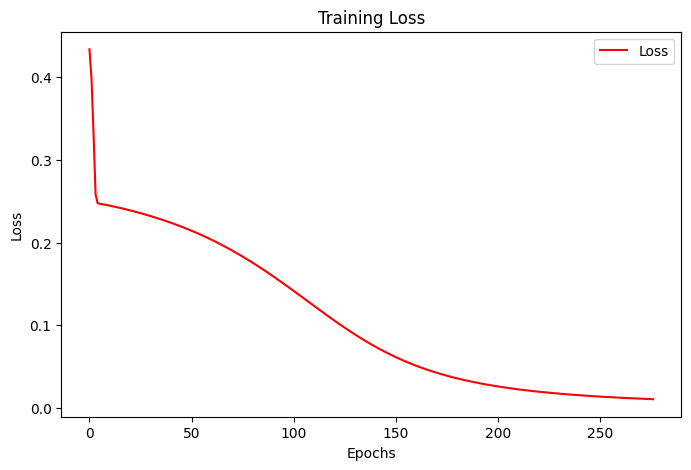

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(nn.losses, label="Loss", color="r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()